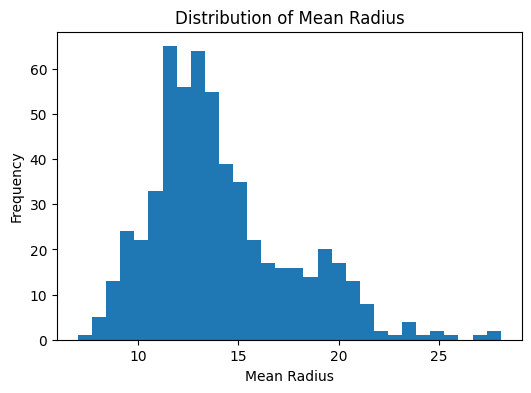

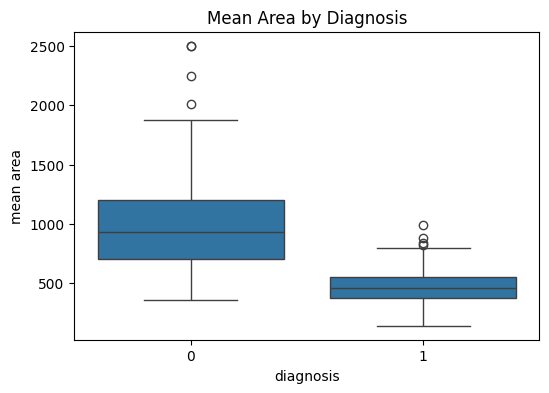

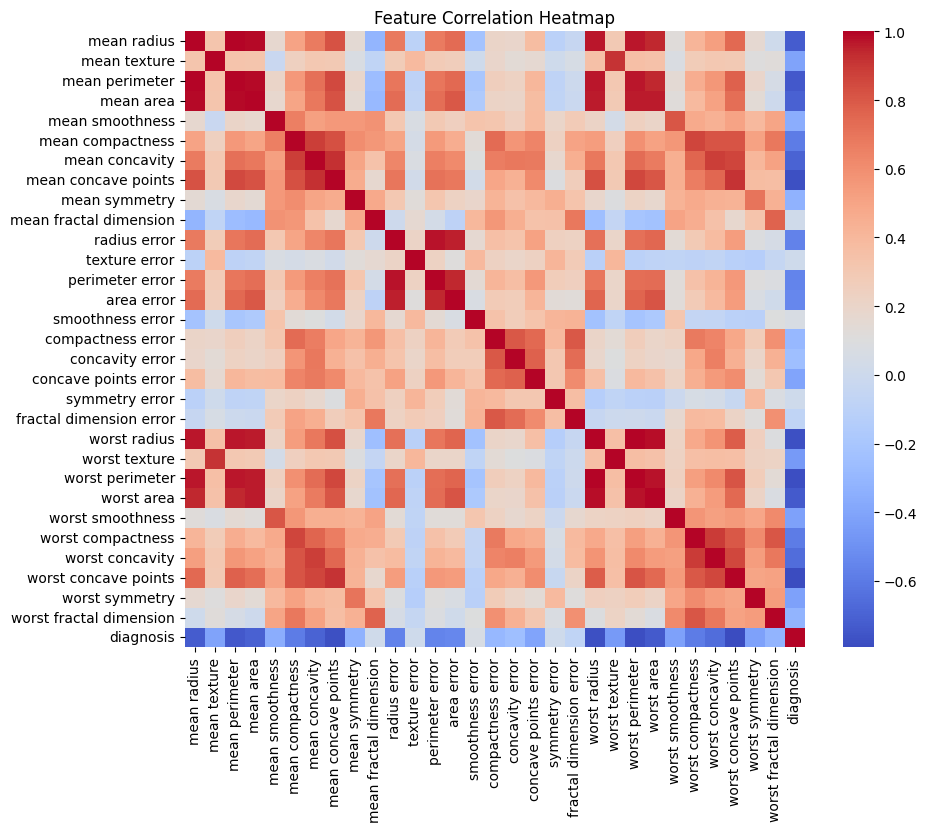

Logistic Regression Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   m

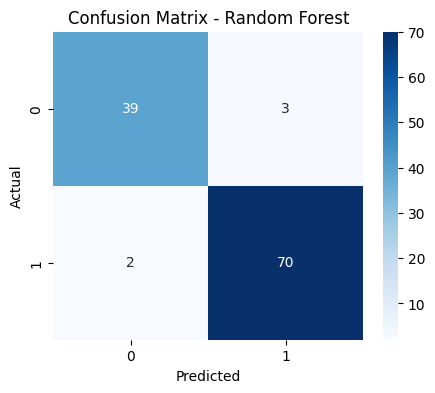

,Feature,Importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226
2,mean perimeter,0.069574
0,mean radius,0.068676
6,mean concavity,0.057638
3,mean area,0.049172
26,worst concavity,0.034340


In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#loading the dataset
data = load_breast_cancer()

# Creating a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

# Display first few rows
df.head()
# Dataset shape
df.shape
# Check for missing values
df.isnull().sum()
#descriptive statistics
df.describe()
# Class distribution
df['diagnosis'].value_counts()
#exploratory data analysis
#feature distribution
plt.figure(figsize=(6,4))
plt.hist(df['mean radius'], bins=30)
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()
#comparison by diagnosis
plt.figure(figsize=(6,4))
sns.boxplot(x='diagnosis', y='mean area', data=df)
plt.title("Mean Area by Diagnosis")
plt.show()
#correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#k-means clustering
X = df.drop('diagnosis', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters
pd.crosstab(df['diagnosis'], df['cluster'])
#predictive modelling pre-processing
X = df.drop(['diagnosis', 'cluster'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
#support vector machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
#model comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results
#confusion metrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#feature importance of random forest 
importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)
